## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 500)]

Simulator...
Validator...
       *** USING local_exploration_validator_A


CALLED FIT_CURVE
Y_PRED[ -4.35870528  -2.86463701  -6.12405864 -14.55959315 -10.90466616
  -4.71754252 -24.80559801 -14.62098415 -14.08956299   2.94321998]
X_VALUES[  1.           7.37856441  26.02359882  56.93510324 100.11307768
 155.55752212 223.26843658 303.24582104 395.48967552 500.        ]
EQUATIONy =  1.6749450531985097e-14x^7  -2.5421641219334512e-11x^6 + 1.4731795952092938e-08x^5  -4.076549683874843e-06x^4 + 0.0005476634273312675x^3  -0.0316391125949501x^2 + 0.4667616679756705x^1 -4.794371439009375
LEAST FIT POINTS:  []
unfit_interval []
least_fit_points []
LF... rest_of_points:       [(1.0, -2.9691189342405937), (7.378564405113078, -5.812665275353151), (26.023598820058996, -3.036539384015133), (56.935103244837755, -17.254301031563326), (100.11307767944936, -9.084785212433848), (155.55752212389382, -5.632420953099754), (22

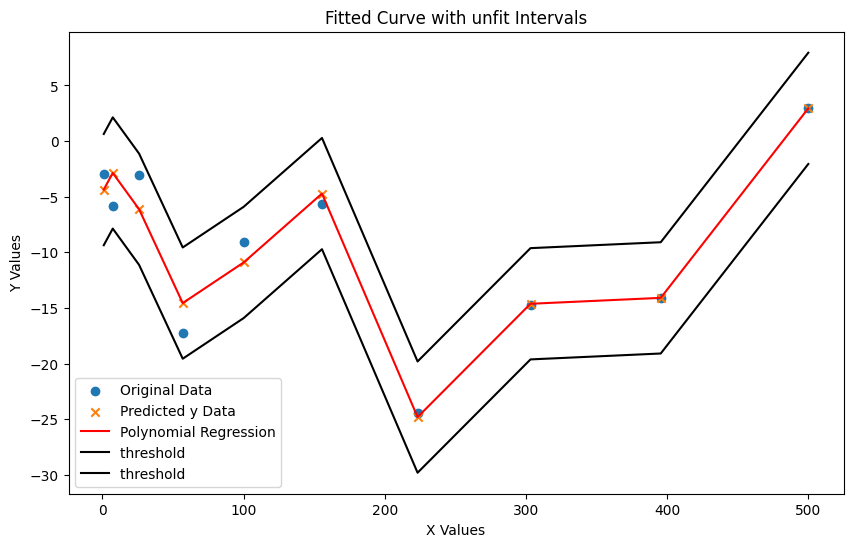

       *** OUTPUT unfit_interval [] 

equation,fit_points,fit_interval
 y =  1.6749450531985097e-14x^7  -2.5421641219334512e-11x^6 + 1.4731795952092938e-08x^5  -4.076549683874843e-06x^4 + 0.0005476634273312675x^3  -0.0316391125949501x^2 + 0.4667616679756705x^1 -4.794371439009375 
 [[1.0, -2.9691189342405937], [7.378564405113078, -5.812665275353151], [26.023598820058996, -3.036539384015133], [56.935103244837755, -17.254301031563326], [100.11307767944936, -9.084785212433848], [155.55752212389382, -5.632420953099754], [223.2684365781711, -24.475120643398032], [303.2458210422812, -14.702154013107364], [395.48967551622417, -14.077402211857327], [500.0, 2.9423797215668333]] 

 [[1, 500]]
       *** OUTPUT validator_intervals [] 



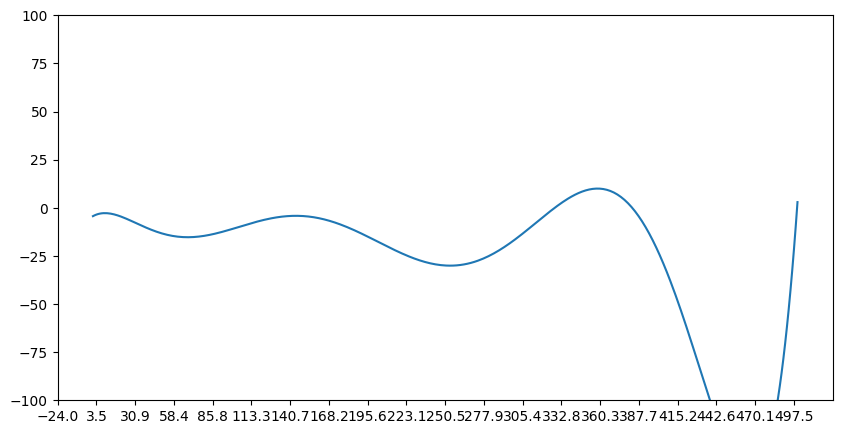

In [1]:
# IMPORT LIBRARIES
import numpy as np

# import global parameters 
# TODO: make inte
# rface (widget) to load/change the parameters (low-priority)
from global_settings import simexSettings,mdf,mdv

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifiers import Modifiers
from ModifierController import ModifierController
from Simulator import Simulator
from Logger import Logger

validator = Validator()
modifier = Modifiers
simulator = Simulator
logger = Logger()

logger_main_arguments = {
    'log_contex': 'overall MAIN stats',
    'main_status': 'begin cycle'
}

logger.log_main(logger_main_arguments)

is_main_func = True
# Initialize interval list
intervals_list=[(mdv['domain_min_interval'], mdv['domain_max_interval'])]





while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = ModifierController.modifierController(intervals_list=intervals_list,local_modifier=mdf['selectedModifier'], do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    
    # print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    intervals_list = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    # Updates interval_list to new range output from validator controller

    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

